In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [2]:
#MODEL = "0110"

MODEL = "0144"

#PATHS = [
# "aorta",
# "right_iliac"   
#]

PATHS = [
"aorta",   
"celiac_hepatic",
"celiac_splenic",
"ext_iliac_left",
"renal_left",
"renal_right",
"SMA"
]

PATHS_LABEL = [
"aorta",
"aorta",
"celiac hepatic",
"celiac splenic",
"ext iliac left",
"renal left",
"renal right",
"SMA"    
]


CASE  = "sim_wom_rcr_real"

mesh  = "coarse"

gen   = 1

quants   = [
 #"area",
 "radius_actual",
 "pressure_0",
 "vWSS_3_boundary",
 "velocity_3"
]

labels = [
    r"radius $(cm)$",
    r"pressure $(mmHg)$",
    r"TAWSS magnitude $(dyne/cm^2)$",
    r"Velocity magnitude $(cm/s)$"
]

models   = list(range(50))
dt       = 0.01

dfs = []

for PATH in PATHS:

    CSV    = "/media/marsdenlab/Data1/UQ/"+MODEL+"/"+CASE+"/csv/"+'/'+PATH+".csv"
                    

    df = pd.read_csv(CSV)
    df = df.loc[df['mesh']==mesh]
    df = df.loc[df['generation'] == gen]
    
    df['pressure_0'] = df['pressure_0']/1333

    points = df['point'].unique()
    point = points[-5]

    df = df.loc[df['point']==point]
    
    dfs.append(df)
    
df = pd.concat(dfs)


In [3]:
df_group = df.groupby(["path"])

print(df_group.get_group("aorta").groupby('model').mean())

       Unnamed: 0      area  generation    length        nx        ny  \
model                                                                   
2           11910  0.329145           1  2.050441 -0.004026 -0.052772   
3           24005  0.374238           1  2.179414 -0.004026 -0.052772   
4           36100  0.251604           1  1.794343 -0.004026 -0.052772   
5           48195  0.238136           1  1.745663 -0.004026 -0.052772   
6           60290  0.359297           1  2.139315 -0.004026 -0.052772   
7           72385  0.324553           1  2.032999 -0.004026 -0.052772   
8           84480  0.312158           1  1.989990 -0.004026 -0.052772   
9           96575  0.390360           1  2.226361 -0.004026 -0.052772   
11         108670  0.297921           1  1.945528 -0.004026 -0.052772   
12         120765  0.341294           1  2.082716 -0.004026 -0.052772   
15         132860  0.473514           1  2.451037 -0.004026 -0.052772   
17         144955  0.234791           1  1.735059 -

In [4]:
print(quants)
for path in PATHS:
    data = df_group.get_group(path).groupby("model").mean()
    
    s = path

    for i,q in enumerate(quants):
    
        mu  = data[q].mean()
        std = data[q].std()
        cv  = std*1.0/mu

        std_mc = std/np.sqrt(len(data[q]))
        cv_mc  = std_mc/mu
        #print("{} - {:.2f} - {:.3f} - {:.3f} - {:.3f}".format(q,mu,std,cv,cv_mc))
        
        s = s + " & {:.2f} & {:.3f}".format(mu,cv_mc)
        
    print(s)

['radius_actual', 'pressure_0', 'vWSS_3_boundary', 'velocity_3']
aorta & 0.32 & 0.012 & 102.59 & 0.002 & 30.62 & 0.018 & 57.13 & 0.013
celiac_hepatic & 0.22 & 0.016 & 96.76 & 0.009 & 50.12 & 0.044 & 79.11 & 0.032
celiac_splenic & 0.26 & 0.012 & 103.58 & 0.003 & 36.08 & 0.017 & 55.71 & 0.016
ext_iliac_left & 0.32 & 0.013 & 99.72 & 0.002 & 33.58 & 0.015 & 53.96 & 0.013
renal_left & 0.26 & 0.014 & 105.42 & 0.003 & 38.35 & 0.017 & 51.17 & 0.014
renal_right & 0.23 & 0.018 & 101.70 & 0.003 & 46.59 & 0.018 & 70.08 & 0.011
SMA & 0.25 & 0.011 & 115.23 & 0.005 & 35.25 & 0.017 & 54.17 & 0.016


In [5]:
print(quants)
for path in PATHS:
    data = df_group.get_group(path).groupby("model").mean()
    
    s = path

    for i,q in enumerate(quants):
    
        mu  = data[q].mean()
        std = data[q].std()
        cv  = std*1.0/mu

        std_mc = std/np.sqrt(len(data[q]))
        cv_mc  = std_mc/mu
        #print("{} - {:.2f} - {:.3f} - {:.3f} - {:.3f}".format(q,mu,std,cv,cv_mc))
        
        s = s + " & {:.2f} & {:.3f}".format(mu,cv)
        
    print(s)

['radius_actual', 'pressure_0', 'vWSS_3_boundary', 'velocity_3']
aorta & 0.32 & 0.090 & 102.59 & 0.015 & 30.62 & 0.134 & 57.13 & 0.093
celiac_hepatic & 0.22 & 0.118 & 96.76 & 0.066 & 50.12 & 0.323 & 79.11 & 0.233
celiac_splenic & 0.26 & 0.089 & 103.58 & 0.024 & 36.08 & 0.126 & 55.71 & 0.120
ext_iliac_left & 0.32 & 0.097 & 99.72 & 0.013 & 33.58 & 0.108 & 53.96 & 0.095
renal_left & 0.26 & 0.101 & 105.42 & 0.020 & 38.35 & 0.123 & 51.17 & 0.102
renal_right & 0.23 & 0.131 & 101.70 & 0.021 & 46.59 & 0.132 & 70.08 & 0.084
SMA & 0.25 & 0.080 & 115.23 & 0.033 & 35.25 & 0.127 & 54.17 & 0.119


['radius_actual', 'pressure_0', 'vWSS_3_boundary', 'velocity_3']


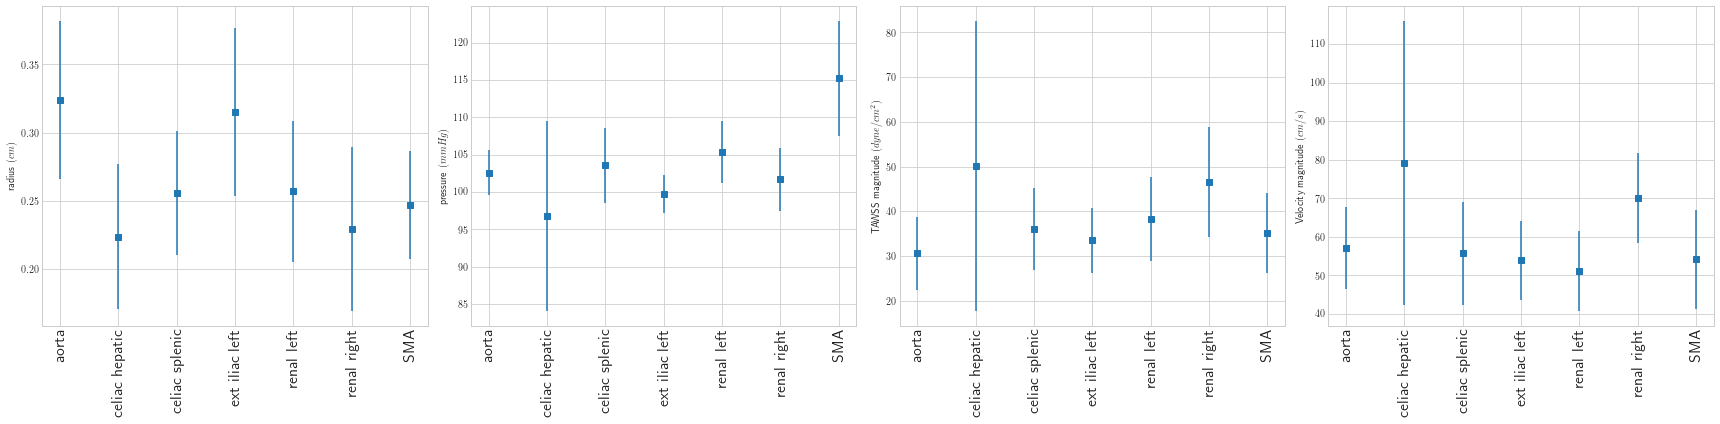

In [6]:
print(quants)

Size  = 6
count = 0
Wplot = len(labels)
f, axarr = plt.subplots(1, Wplot, figsize=(Wplot*Size,Size))

for i,q in enumerate(quants):
    
    vals = []
    errs = []
    x = range(len(PATHS))
    for path in PATHS:
        data = df_group.get_group(path).groupby("model").mean()

        mu  = data[q].mean()
        std = data[q].std()
        cv  = std*1.0/mu

        std_mc = std/np.sqrt(len(data[q]))
        cv_mc  = std_mc/mu
        
        vals.append(mu)
        errs.append(std*2)
        
    axarr[i].errorbar(x,vals,errs, marker='s',linestyle='')
    axarr[i].set_ylabel(labels[i])
    axarr[i].set_xticklabels(PATHS_LABEL, rotation='vertical', fontsize=16)

plt.tight_layout()
plt.savefig("ah.pdf",dpi=300)
plt.show()
plt.close()